<a href="https://colab.research.google.com/github/DanielRajChristeen/Custom_MobileNetV2/blob/main/Custom_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Custom Trained MobileNetV2 — Classify Dog and Cat Images**

## **Step 1 — What is MobileNetV2?**

*   MobileNetV2 is a lightweight deep learning model trained on ImageNet (1000 classes).
*  It’s optimized for speed and small size, making it perfect for demos and real-world mobile apps.
*  We’ll use it as pre-trained model to instantly classify multiple images.

## **Step 2 — Setup and Imports**
Install and import the required libraries to build and train the model.

The need of each library,
* os – Handle file paths and directory operations
* shutil – Copy, move, or delete files and folders
* numpy – Perform numerical operations on arrays
* matplotlib.pyplot – Plot graphs and display images
* tensorflow – Core deep learning framework for training models
* ImageDataGenerator – Generate batches of images with augmentation
* MobileNetV2 – Load the pretrained MobileNetV2 architecture
* GlobalAveragePooling2D – Reduce feature maps to a compact vector
* Dense – Fully connected layer for classification
* Model – Build and manage the complete neural network


In [2]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

## **Step 3 — Load and Preprocess Dataset**
Setup Basic Settings, clean dataset, and set up Data Generator suitable for training basic MobileNetV2 model

In [3]:
# ------------------------
# Basic Settings
# ------------------------
IMG_SIZE = 128
BATCH_SIZE = 32

In [5]:
# Clean unwanted .ipynb_checkpoints folders (avoid extra classes)
for split in ['train', 'test']:
    chkpt = os.path.join('dataset', split, '.ipynb_checkpoints')
    if os.path.exists(chkpt):
        shutil.rmtree(chkpt)

In [8]:
# ------------------------
# Data Generators
# ------------------------
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Train classes:", os.listdir("dataset/train"))
print("Test classes:", os.listdir("dataset/test"))
print("\n")

train_gen = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Train classes: ['dog', 'cat']
Test classes: ['dog', 'cat']


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


## **Step 4 — Build MobileNetV2 Model**


In [10]:
base = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                   include_top=False,
                   weights='imagenet')
base.trainable = False  # freeze base layers

x = GlobalAveragePooling2D()(base.output)
out = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base.input, outputs=out)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Step 5 — Train the Model**
Train the model on your dataset and store the training history.

In [11]:

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5348 - loss: 0.8239 - val_accuracy: 0.8000 - val_loss: 0.4790
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 0.8611 - loss: 0.3574 - val_accuracy: 0.8929 - val_loss: 0.3316
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 799ms/step - accuracy: 0.9030 - loss: 0.2380 - val_accuracy: 0.8929 - val_loss: 0.2931
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 815ms/step - accuracy: 0.9288 - loss: 0.1957 - val_accuracy: 0.9143 - val_loss: 0.2703
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 828ms/step - accuracy: 0.9552 - loss: 0.1382 - val_accuracy: 0.9143 - val_loss: 0.2576
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 651ms/step - accuracy: 0.9534 - loss: 0.1339 - val_accuracy: 0.9143 - val_loss: 0.2618
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 973ms/step - accuracy: 0.9676 - loss: 0.1054 - val_accuracy: 0.9143 - val_loss: 0.2488
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 798ms/step - accuracy: 0.9763 - loss: 0.0926 - val_accuracy

## **Step 6 — Evaluate and Visualize Results**
Check model performance and visualize accuracy and loss trends.


=== Training Completed ===
Train samples: 447
Validation samples: 110
Test samples: 140
Test Accuracy: 91.43%
Test Loss: 0.2309
Total Trainable Parameters: 2,259,265



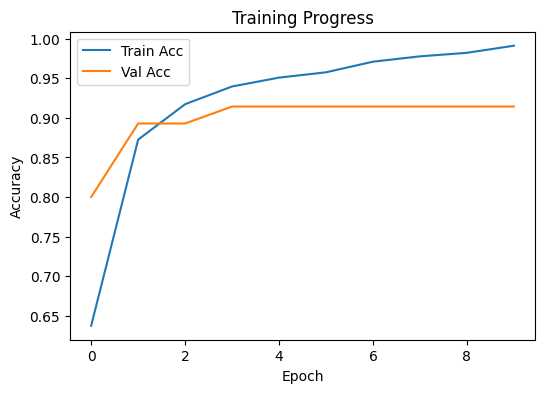

In [12]:
# ------------------------
# Evaluate
# ------------------------
test_loss, test_acc = model.evaluate(test_gen, verbose=0)

print("\n=== Training Completed ===")
print(f"Train samples: {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")
print(f"Test samples: {test_gen.samples}")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Total Trainable Parameters: {model.count_params():,}\n")

# ------------------------
# Plot Training Progress
# ------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()

# **Step 7 — Predict on New Images**
Run predictions on custom images using the same preprocessing for consistency.

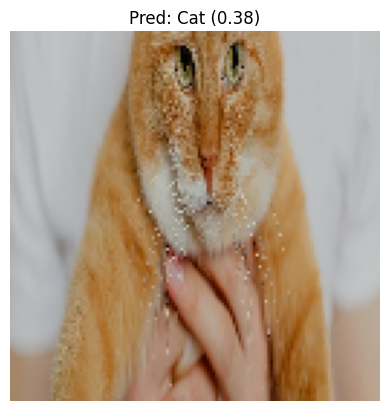

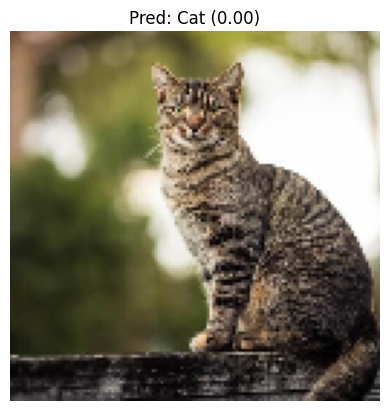

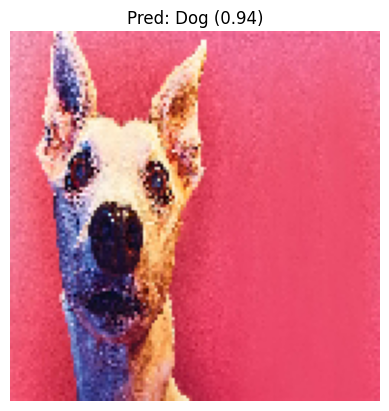

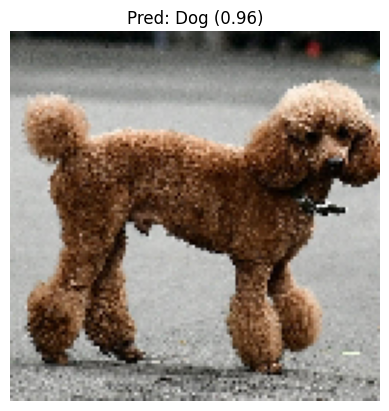

In [13]:
sample_paths = [
    "/content/sample1.jpg",
    "/content/sample2.jpg",
    "/content/sample3.jpg",
    "/content/sample4.jpg"
]

for path in sample_paths:
    img = tf.keras.utils.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array, verbose=0)[0][0]
    label = "Dog" if pred > 0.5 else "Cat"

    plt.imshow(img_array[0]) # Use the numpy array for displaying
    plt.title(f"Pred: {label} ({pred:.2f})")
    plt.axis("off")
    plt.show()